In [1]:
import pennylane as qml
from pennylane import numpy as np

import matplotlib.pyplot as plt

dev = qml.device('default.qubit', wires= 1)

# == Hamiltonian setup ==
coeffs = [0.5]
obs = [qml.PauliZ(0)]

hamiltonian = qml.Hamiltonian(coeffs, obs)

print('Hamiltonian:', hamiltonian,'\n')

Hamiltonian:   (0.5) [Z0] 



In [6]:
@qml.qnode(dev)
def circuit(tau):
    w = 1
    qml.Hadamard(wires=0)
    
    # qml.RY(np.pi/2, wires=0)
    # qml.RX(np.pi/2, wires=0)
    
    qml.ApproxTimeEvolution(hamiltonian, w * tau, 1)
    
    qml.Hadamard(wires = 0)
    
    return qml.probs(wires=0)
    # return qml.density_matrix(wires=0)

circuit(0)

tensor([[0.5+0.j, 0.5+0.j],
        [0.5+0.j, 0.5+0.j]], requires_grad=True)

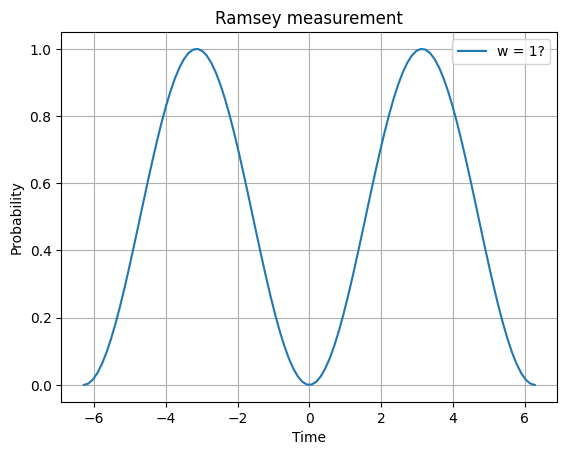

In [3]:
# plot for t

number_of_samples = 100
t_variable = (np.linspace(-2*np.pi, 2*np.pi, number_of_samples))

measurements = np.zeros(number_of_samples)

for i in range(len(t_variable)):
    # 1/2 [1 - cos(w_0*t)]
    # measurements[i] = 1 - abs(circuit(t_variable[i]).numpy()[0])
    measurements[i] = 1 - circuit(t_variable[i]).numpy()[0]

    # append circuit(thetas) as elements of arrary(measurements)
    
fig, ax = plt.subplots()
ax.plot(t_variable, measurements, label = 'w = 1?')
plt.title('Ramsey measurement')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.grid()

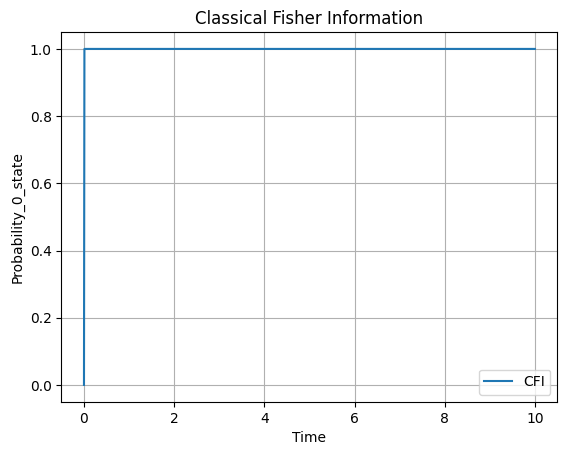

In [4]:
#  == Plot CFI for Ramsey measurement ==

N = 1000
tau_CFI = np.linspace(0, 10.0, N)

# qml.qinfo.classical_fisher(circuit)(tau_CFI[50])


CFI = np.zeros(N)

for i in range(len(tau_CFI)):
    # 1/2 [1 - cos(w_0*t)]
    # measurements[i] = 1 - abs(circuit(t_variable[i]).numpy()[0])
    CFI[i] = qml.qinfo.classical_fisher(circuit)(tau_CFI[i])

    # append circuit(thetas) as elements of arrary(measurements)
    
fig, ax = plt.subplots()
ax.plot(tau_CFI, CFI, label = 'CFI')
plt.title('Classical Fisher Information')
plt.xlabel('Time')
plt.ylabel('Probability_0_state')
plt.legend()
plt.grid()
